<a href="https://colab.research.google.com/github/GabrielMarkss/Calculadora/blob/main/Projeto_Jeff_BD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
import pandas as pd

In [108]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [109]:
dataset = pd.read_csv('dataset-alzheimer.csv', sep=';', encoding='iso-8859-1')
dataset

,Entidade,Código,Ano,Óbitos,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,Afghanistan,AFG,2019,30.79,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,African Region (WHO),0,2019,25.62,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Albania,ALB,2019,24.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Algeria,DZA,2019,26.97,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,American Samoa,ASM,2019,23.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
102,Kuwait,KWT,2019,25.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN
103,Kyrgyzstan,KGZ,2019,23.47,NaN,NaN,NaN,NaN,NaN,NaN,NaN
104,Laos,LAO,2019,22.35,NaN,NaN,NaN,NaN,NaN,NaN,NaN
105,Latin America & Caribbean (WB),0,2019,23.65,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [110]:
dataset.columns = dataset.columns.str.strip()
print(dataset.columns)


Index(['Entidade', 'Código', 'Ano', 'Óbitos', 'Unnamed: 4', 'Unnamed: 5',
       'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10'],
      dtype='object')


In [69]:
dataset ['Óbitos'].median() # Média

23.03

In [70]:
dataset ['Óbitos'].sum() # Soma

2511.24

In [24]:
dataset ['Óbitos'].min() # Mínimo

18.23

In [20]:
dataset ['Óbitos'].max() # Máximo

33.29

In [21]:
dataset ['Óbitos'].std() # Desvio Padrão

2.61708334817186

In [123]:
dataset.groupby('Óbitos')['Código'].describe() # Retorna estatísticas descritivas da coluna

,count,unique,top,freq
Óbitos,,,,
18.23,1,1,BGD,1
19.12,1,1,IND,1
19.69,1,1,DNK,1
20.10,1,1,FIN,1
20.12,1,1,AUT,1
...,...,...,...,...
27.63,1,1,COG,1
27.82,1,1,ETH,1
28.59,1,1,GAB,1


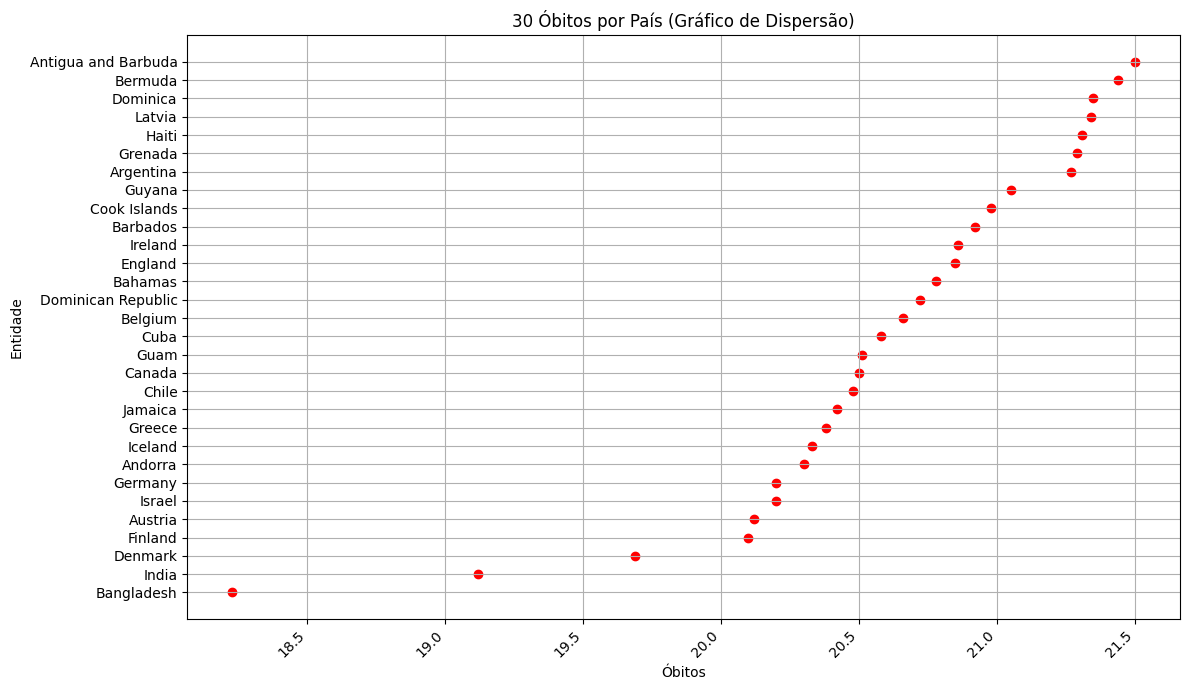

In [156]:
# Agrupar por 'Entidade' e obter o número total de óbitos em cada uma
entidade_obitos = dataset.groupby('Entidade')['Óbitos'].sum().reset_index()

# Ordenar os dados pelo número de óbitos em ordem crescente
entidade_obitos = entidade_obitos.sort_values(by='Óbitos', ascending=True)

# Selecionar os 30 menores valores
top_10_entidade = entidade_obitos.head(30)

# Plotar o gráfico de dispersão para 'Entidade'
plt.figure(figsize=(12, 7))
plt.scatter(top_10_entidade['Óbitos'], top_10_entidade['Entidade'], color='r')
plt.title('30 Óbitos por País (Gráfico de Dispersão)')
plt.xlabel('Óbitos')
plt.ylabel('Entidade')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()

Text(0.5, 1.0, '15 Maiores números de Óbitos')

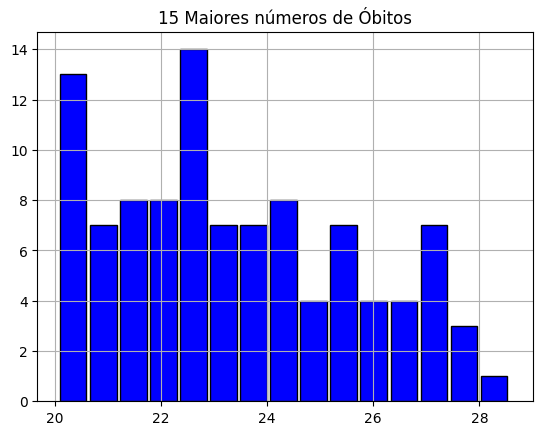

In [102]:
dataset[(dataset['Óbitos'] >= 20) & (dataset['Óbitos'] <= 30)] ['Óbitos'].hist(bins=15, color='blue',width=0.5,edgecolor='black')
plt.title('15 Maiores números de Óbitos')

In [36]:
import matplotlib.pyplot as plt


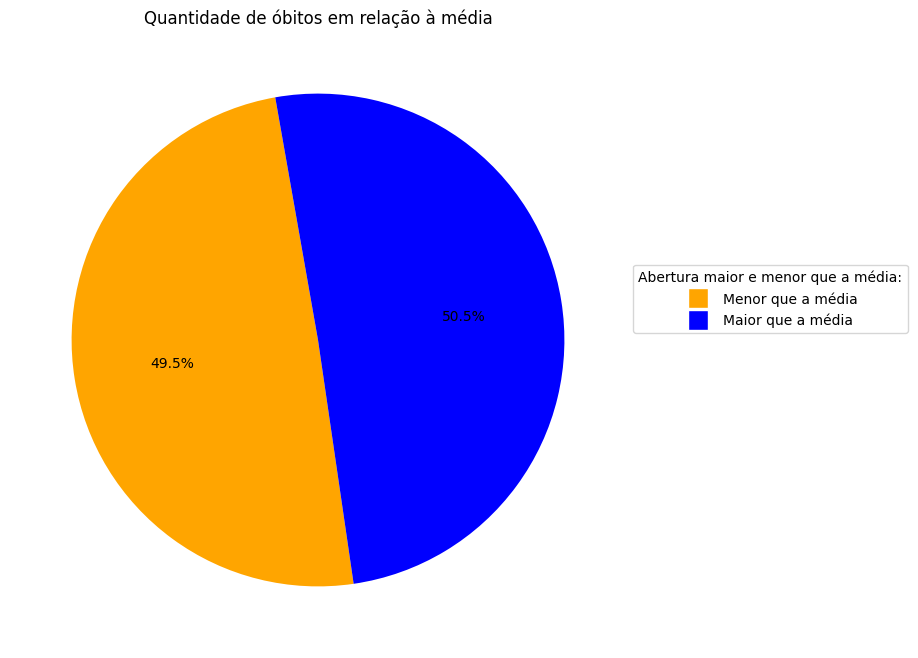

In [42]:


óbitos_menores = dataset[dataset['Óbitos'] < 23.03]['Óbitos'].count()
óbitos_maiores = dataset[dataset['Óbitos'] >= 23.03]['Óbitos'].count()

# Definição das cores
cores = ['orange', 'blue']

# Gráfico de pizza
fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie([óbitos_menores, óbitos_maiores], colors=cores, autopct='%1.1f%%', startangle=100)

# Adicionando os quadrados de cor
legend_labels = ['Menor que a média', 'Maior que a média']
legend_patches = [plt.Line2D([0], [0], marker='s', color='w', markersize=15, markerfacecolor=cor) for cor in cores]
ax.legend(legend_patches, legend_labels, title="Abertura maior e menor que a média:", loc="lower left", bbox_to_anchor=(1, 0.5), ncol=1)

plt.title('Quantidade de óbitos em relação à média')
plt.show()

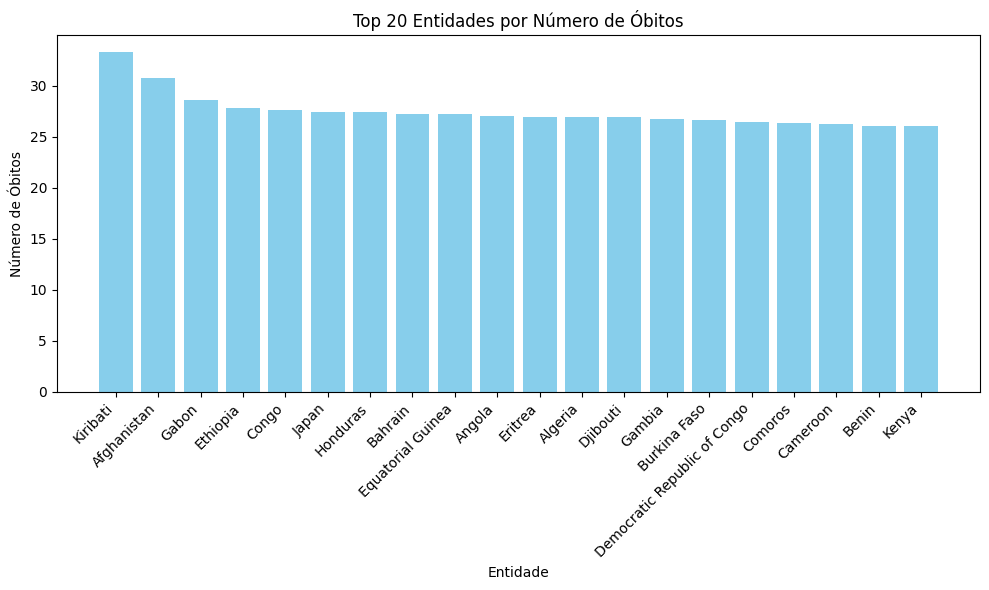

In [44]:
entidades_obitos = dataset.groupby('Entidade')['Óbitos'].sum().reset_index()

# Ordenar as entidades pelo número de óbitos em ordem decrescente
entidades_obitos = entidades_obitos.sort_values(by='Óbitos', ascending=False)

# Selecionar as 20 primeiras entidades
top_20_entidades = entidades_obitos.head(20)

# Plotar o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(top_20_entidades['Entidade'], top_20_entidades['Óbitos'], color='skyblue')
plt.title('Top 20 Páises por número de Óbitos')
plt.xlabel('Entidade')
plt.ylabel('Número de Óbitos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()